# Analysis of Bitcoin evolution
get some insights on BTC evolution incl. a comparison versus MSCI World as well as a try to predict a data point in the future

## Needed modules imported

In [1]:
# Import of needed modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


plt.style.use('ggplot') # Style for visualization


## Import of data
Import of CSV of Yahoo finance and get some insights with a short visuaization in a function

In [2]:
# Impot logic for the Yahoo Finance history data
# Defining a fuction
def dataimport(source):
    df = pd.read_csv(source, parse_dates = ['Date'])
    df['Date']
    print('Datatypes:\n{}\n'.format(df.dtypes))
    df.dropna(axis = 0, inplace = True) # drop nan values
    print('Missing Values:\n {}\n'.format(df.isnull().sum()))
    df.head()

    df.groupby('Date')['Close', 'High', 'Low'].max().plot(figsize = [10, 10])
    plt.tight_layout()
    plt.show()
    return df

Import data for **BTC** and **MSCI World**

Datatypes:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



C:\Users\josef\AppData\Local\Temp/ipykernel_752/3492934819.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Date')['Close', 'High', 'Low'].max().plot(figsize = [10, 10])


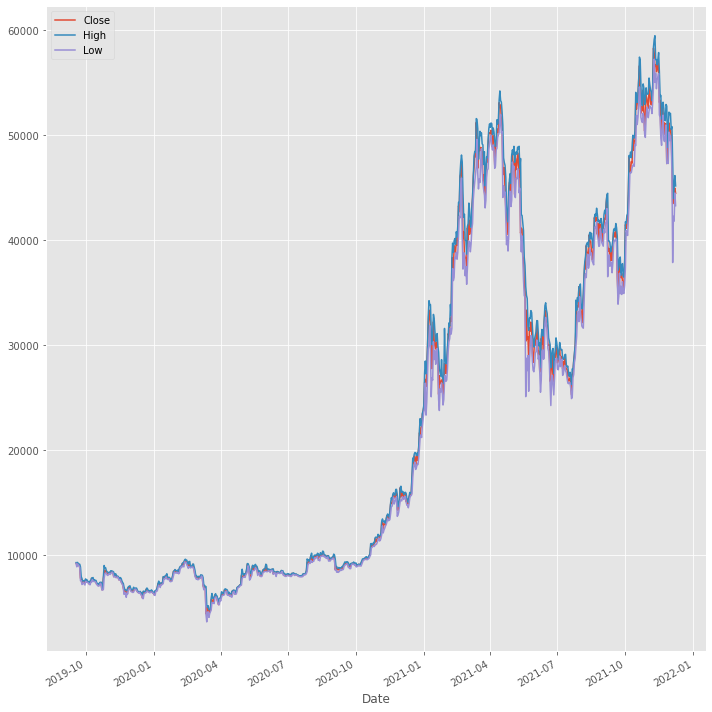

Datatypes:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



C:\Users\josef\AppData\Local\Temp/ipykernel_752/3492934819.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Date')['Close', 'High', 'Low'].max().plot(figsize = [10, 10])


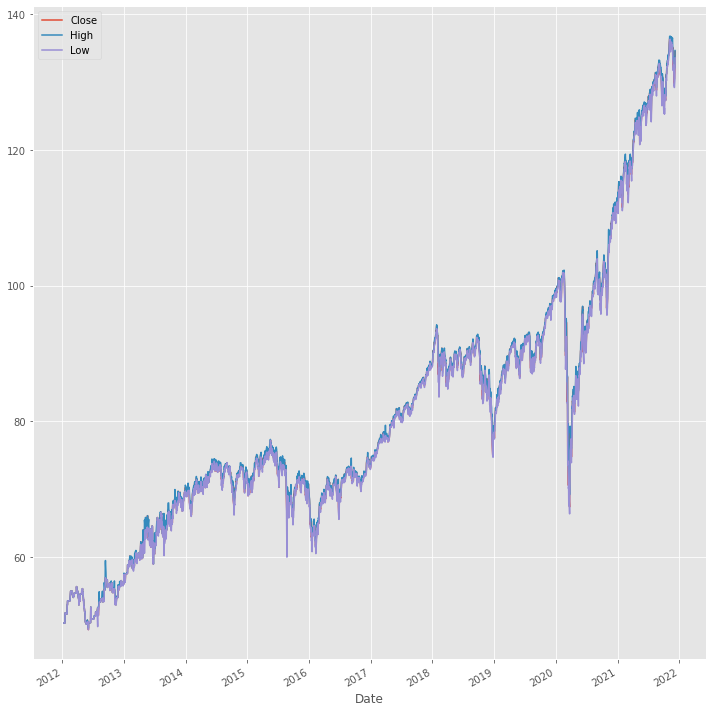

In [3]:
#Import of Data and a quick look on data quality
df_btc = dataimport('BTC-EUR.csv')
df_MSCIWorld = dataimport('MSCIWorld.csv')

In [4]:
# Statistical analysis of BTC vs. MSCI World

df = df_btc.merge(df_MSCIWorld.loc[:, ['Date','Close']], left_on = 'Date', right_on = 'Date')
print(df.head())
print(df.loc[:, ['Close_x', 'Close_y']].describe())



        Date         Open         High          Low      Close_x    Adj Close  \
0 2019-09-18  9253.401367  9316.917969  9240.340820  9246.486328  9246.486328   
1 2019-09-19  9248.524414  9319.454102  8917.574219  9292.973633  9292.973633   
2 2019-09-20  9292.886719  9334.069336  9194.604492  9239.483398  9239.483398   
3 2019-09-23  9136.746094  9164.031250  8848.295898  8850.279297  8850.279297   
4 2019-09-24  8850.277344  8901.731445  7600.185547  7826.957031  7826.957031   

         Volume    Close_y  
0  1.466026e+10  92.660004  
1  1.804724e+10  92.769997  
2  1.337076e+10  92.379997  
3  1.377658e+10  92.220001  
4  2.270112e+10  91.669998  
            Close_x     Close_y
count    557.000000  557.000000
mean   22217.527293  108.249282
std    16540.424792   16.538128
min     4444.237305   67.389999
25%     8201.646484   95.940002
50%    11589.126953  102.930000
75%    38240.878906  124.610001
max    58305.039063  136.449997


## Comparison of MSCI vs BTC 
visualization with common starting point to get an impression about the evolution over time

Date
2019-09-18    1.000000
2019-09-19    1.005028
2019-09-20    0.999243
2019-09-23    0.957151
2019-09-24    0.846479
Name: Close_x, dtype: float64
Date
2019-09-18    1.000000
2019-09-19    1.001187
2019-09-20    0.996978
2019-09-23    0.995251
2019-09-24    0.989316
Name: Close_y, dtype: float64


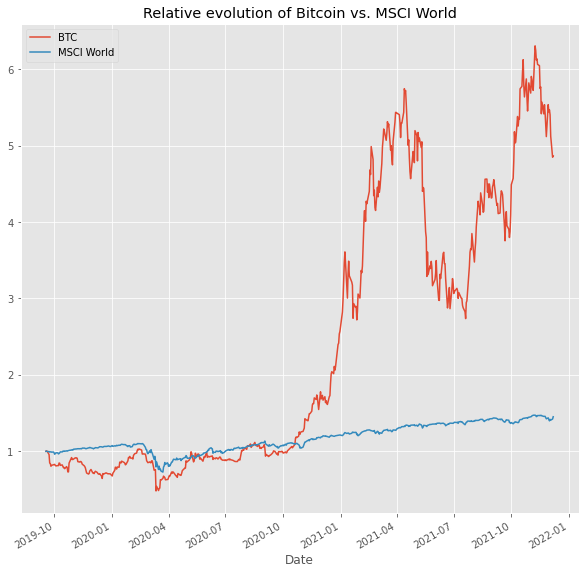

In [5]:
# Plotting of BTC vs. MSCI World / Values normalized by first as of date to get an appropriate representation 
df_plot = df.groupby('Date')['Close_x'].max()/df.iloc[0, 4].max()
df_plot.plot(figsize = [10,10])
print(df_plot.head())
df_plot = df.groupby('Date')['Close_y'].max()/df.iloc[0, 7]
df_plot.plot()
print(df_plot.head())
plt.legend(['BTC', 'MSCI World'])
plt.title('Relative evolution of Bitcoin vs. MSCI World')
plt.show()


Bitcoin outperformes the MSCI World with a much higher risk of a loss.

## Regression analysis
A *simpßle* linear regression modell for the BTC is build using the previous 5 days.

A new vaiable will be introduced (Close Price 5 day in advance) which will be used to predict the current value

In [6]:
df_btc.loc[:, 'Close_5'] = df_btc.loc[:, 'Close'].shift(-5)
df_btc.dropna(inplace = True)

Quite high correlation between the two values can already be seen in the scatter plot

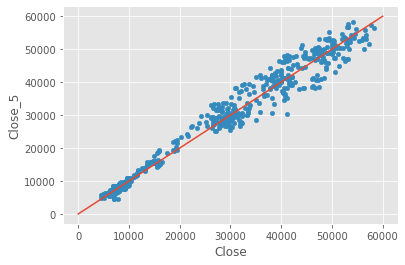

In [14]:
#fig, ax = plt.subplots()
df_btc.loc[:, ['Close', 'Close_5']].plot(kind = 'scatter', x = 'Close', y = 'Close_5')
lin = range(60000)
plt.plot(lin, lin)

plt.show()

In [8]:
# Linear regression and prediction of data
df_btc_reg = pd.DataFrame(preprocessing.scale(df_btc.loc[:, ['Close', 'Close_5']]))


X = np.array(df_btc_reg.iloc[:, 0]).reshape(-1, 1)
y = np.array(df_btc_reg.iloc[:, 1])

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X, y)

print ('Coefficients: ', regr.coef_)
print('Variance score: %.2f' % regr.score(X, y))

Coefficients:  [0.98955647]
Variance score: 0.98


A Multiple Linear Regression Modell added to improve the prediction

In [9]:
# Linear regression and prediction of BTC data

for i in range(1, 6):
    df_btc.loc[:, 'Close_{}'.format(i)] = df_btc.loc[:, 'Close'].shift(-i)

df_btc.dropna(inplace = True)


df_btc_reg = pd.DataFrame(preprocessing.scale(df_btc.loc[:, ['Close', 'Close_1', 'Close_2', 'Close_3', 'Close_4', 'Close_5']]))


X = np.array(df_btc_reg.iloc[:, 1:6])
y = np.array(df_btc_reg.iloc[:, 0])

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X, y)

print ('Coefficients: ', regr.coef_)
print('Variance score: %.2f' % regr.score(X, y))



Coefficients:  [ 9.45067447e-01  6.39150347e-02 -8.60882571e-04  5.47865569e-02
 -6.50866578e-02]
Variance score: 1.00


### Showing corelation between the used variables

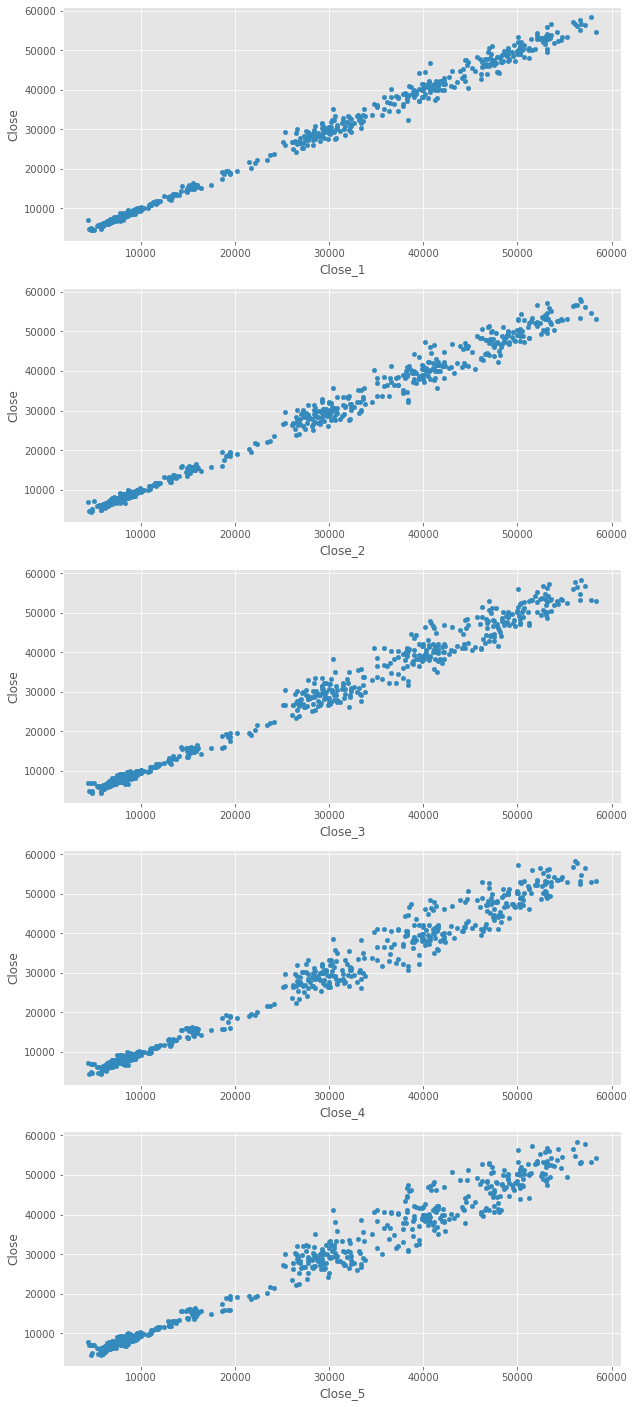

In [10]:
fig, ax = plt.subplots(nrows = 5, figsize = (10, 25))

for i in range(1, 6):
    df_btc.plot(kind = 'scatter', x = 'Close_{}'.format(i), y = 'Close', ax = ax[i-1])
plt.show()